In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [17]:
train_dataset = datasets.MNIST(
    root='train',
    train=True,
    download=True,
    transform=ToTensor()
    )

test_dataset = datasets.MNIST(
    root='test',
    train=False,
    download=True,
    transform=ToTensor()
    )

In [18]:
train_dataloader = DataLoader(train_dataset, 3)
test_dataloader = DataLoader(test_dataset, 3)

In [19]:
iter(train_dataloader).next()[1]

tensor([5, 0, 4])

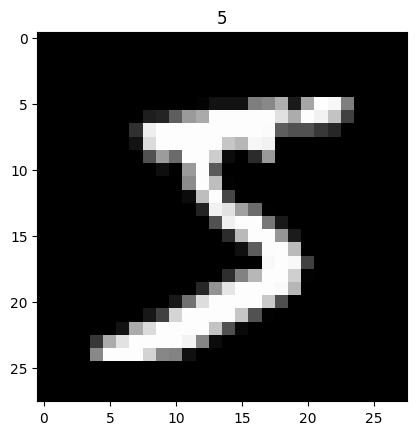

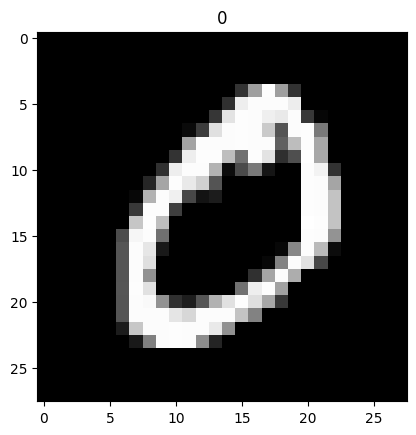

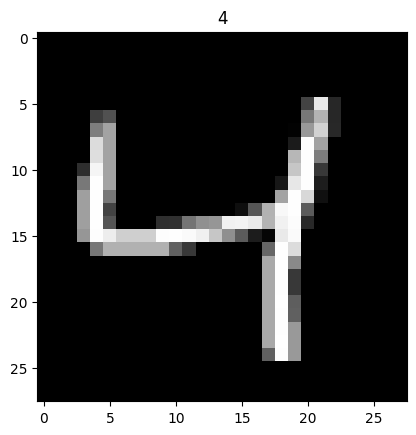

In [20]:
for num in range(0,3):
    image = iter(train_dataloader).next()[0][num]
    label = iter(train_dataloader).next()[1][num]
    fig, ax = plt.subplots(1,1)
    plt.imshow(image.view(28,28),cmap='gray')
    plt.title(int(label))

In [21]:
# Build Model

class NeuralNetwork(nn.Module):
    def __init__(self,w:int=28, dim:int=512) -> None:
        self.w = w
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(w*w,dim),
            nn.ReLU(),
            nn.Linear(dim, dim),
            nn.ReLU(),
            nn.Linear(dim, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

In [22]:
model = NeuralNetwork()

In [23]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [24]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
def train(dataloader, model, loss_fn, optim):
    size = len(dataloader.dataset)
    for batch , (X,y) in enumerate(dataloader):
        output = model(X)
        loss = loss_fn(output, y)

        optim.zero_grad()
        loss.backward()
        optim.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch *len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [26]:
# why does the test does not need optim? Because there is no need to provide the next set of values for the model to back propagate
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X, y in dataloader:
            output = model(X)
            test_loss += loss_fn(output, y).item()
            # need the understand this line
            correct += (output.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Acc : {(100*correct):>0.1f}%, Avg Loss : {test_loss:>8f} \n")

In [27]:
epochs = 5

In [28]:
for t in range(epochs):
    print(f"Epochs {t+1}\n ********************************")
    train(train_dataloader, model, loss_fn, optim)
    test(test_dataloader, model, loss_fn)

Epochs 1
 ********************************
loss: 2.317466  [    0/60000]
loss: 2.288927  [  300/60000]
loss: 2.300904  [  600/60000]
loss: 2.324187  [  900/60000]
loss: 2.319298  [ 1200/60000]
loss: 2.275793  [ 1500/60000]
loss: 2.290096  [ 1800/60000]
loss: 2.200332  [ 2100/60000]
loss: 2.293155  [ 2400/60000]
loss: 2.225773  [ 2700/60000]
loss: 2.304245  [ 3000/60000]
loss: 2.276638  [ 3300/60000]
loss: 2.245322  [ 3600/60000]
loss: 2.212257  [ 3900/60000]
loss: 2.178171  [ 4200/60000]
loss: 2.254098  [ 4500/60000]
loss: 2.313707  [ 4800/60000]
loss: 2.187260  [ 5100/60000]
loss: 2.250957  [ 5400/60000]
loss: 2.208658  [ 5700/60000]
loss: 2.088092  [ 6000/60000]
loss: 2.188932  [ 6300/60000]
loss: 2.162763  [ 6600/60000]
loss: 2.122182  [ 6900/60000]
loss: 2.214591  [ 7200/60000]
loss: 2.159422  [ 7500/60000]
loss: 2.267719  [ 7800/60000]
loss: 2.159058  [ 8100/60000]
loss: 2.128040  [ 8400/60000]
loss: 2.168833  [ 8700/60000]
loss: 2.100249  [ 9000/60000]
loss: 2.069485  [ 9300/6000